<a href="https://www.kaggle.com/code/vijays140291/lower-back-pain-prediction?scriptVersionId=122531054" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Trying the Predict the Lower Back Pain Symptoms

In [108]:
#importing the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pycaret.classification
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Loading the Dataset

In [109]:
df=pd.read_csv('/kaggle/input/lower-back-pain-symptoms-dataset/Dataset_spine.csv')
#showing the dataset
df=df.drop(df.columns[-1],axis=1)
df.head()

Col1       Col2       Col3       Col4        Col5       Col6  \
0  63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1  39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2  68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3  69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4  49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   

       Col7     Col8     Col9     Col10      Col11    Col12 Class_att  
0  0.744503  12.5661  14.5386  15.30468 -28.658501  43.5123  Abnormal  
1  0.415186  12.8874  17.5323  16.78486 -25.530607  16.1102  Abnormal  
2  0.474889  26.8343  17.4861  16.65897 -29.031888  19.2221  Abnormal  
3  0.369345  23.5603  12.7074  11.42447 -30.470246  18.8329  Abnormal  
4  0.543360  35.4940  15.9546   8.87237 -16.378376  24.9171  Abnormal

# Checking for Class Distribution

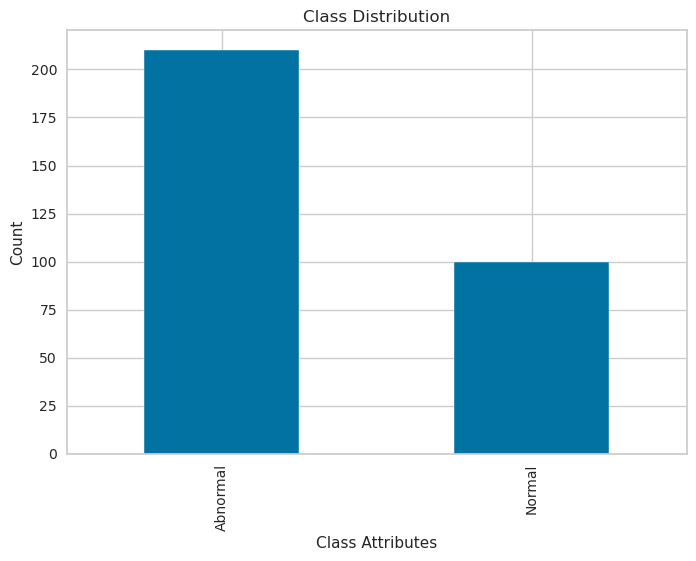

In [110]:
df['Class_att'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class Attributes')
plt.ylabel('Count')
plt.show()

# Checking for Correlation Matrix

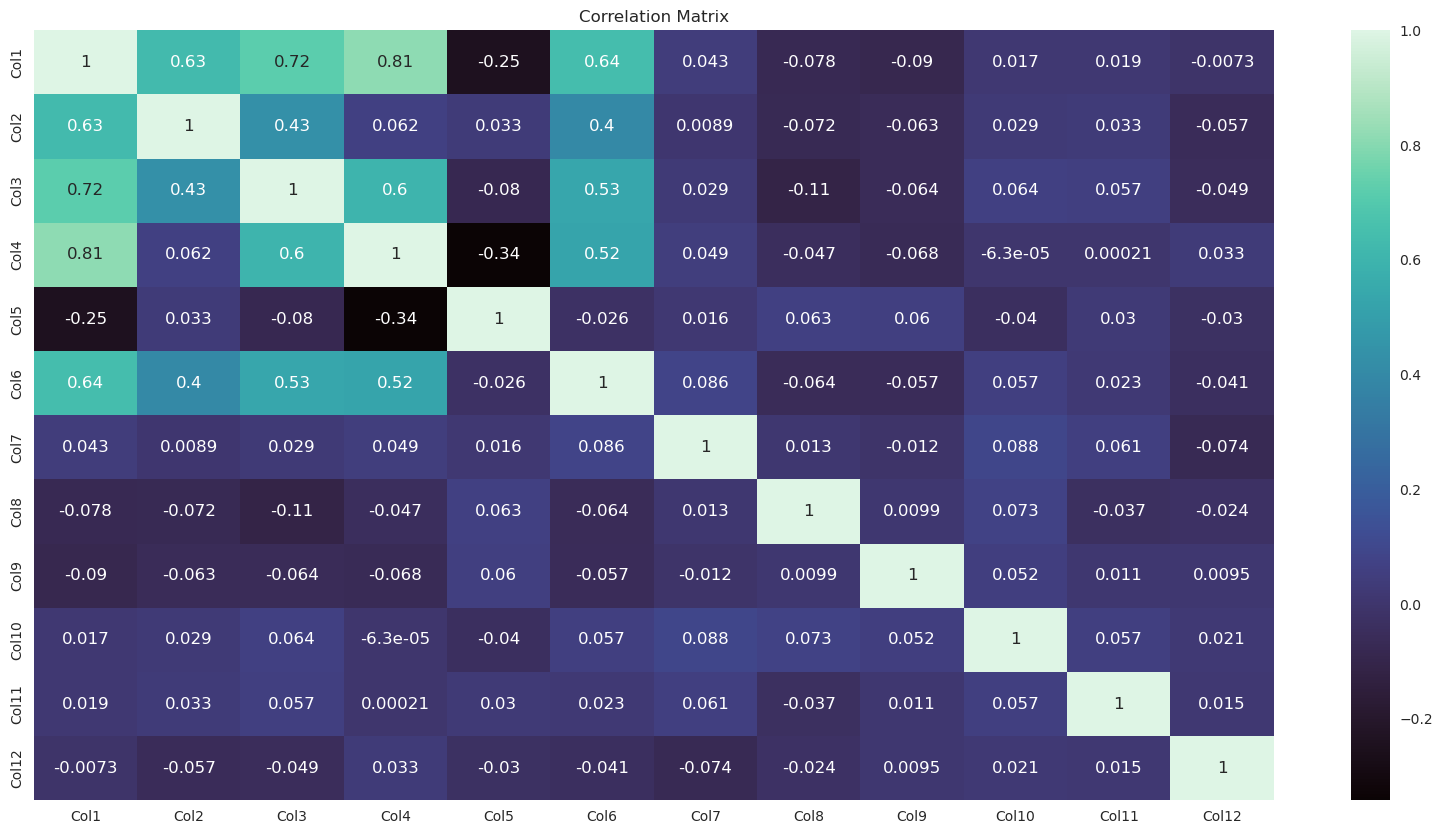

In [111]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='mako')
plt.title('Correlation Matrix')

plt.show()

# Getting the Descriptive Stastistics

In [112]:
df.describe()

Col1        Col2        Col3        Col4        Col5        Col6  \
count  310.000000  310.000000  310.000000  310.000000  310.000000  310.000000   
mean    60.496653   17.542822   51.930930   42.953831  117.920655   26.296694   
std     17.236520   10.008330   18.554064   13.423102   13.317377   37.559027   
min     26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179   
25%     46.430294   10.667069   37.000000   33.347122  110.709196    1.603727   
50%     58.691038   16.357689   49.562398   42.404912  118.268178   11.767934   
75%     72.877696   22.120395   63.000000   52.695888  125.467674   41.287352   
max    129.834041   49.431864  125.742385  121.429566  163.071041  418.543082   

             Col7        Col8        Col9       Col10       Col11       Col12  
count  310.000000  310.000000  310.000000  310.000000  310.000000  310.000000  
mean     0.472979   21.321526   13.064511   11.933317  -14.053139   25.645981  
std      0.285787    8.639423    3.399713    2.893265   12.225582   10.450558  
min      0.003220    7.027000    7.037800    7.030600  -35.287375    7.007900  
25%      0.224367   13.054400   10.417800    9.541140  -24.289522   17.189075  
50%      0.475989   21.907150   12.938450   11.953835  -14.622856   24.931950  
75%      0.704846   28.954075   15.889525   14.371810   -3.497094   33.979600  
max      0.998827   36.743900   19.324000   16.821080    6.972071   44.341200

# Distplot Visualizing relation between Col1 and Col4

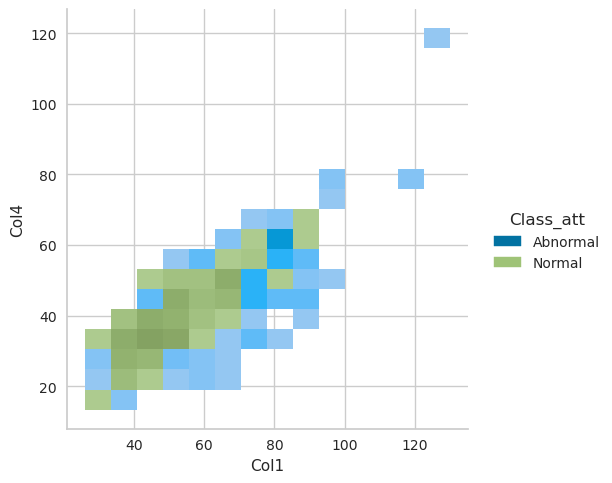

In [113]:
sns.displot(df, x="Col1", y="Col4", hue="Class_att")

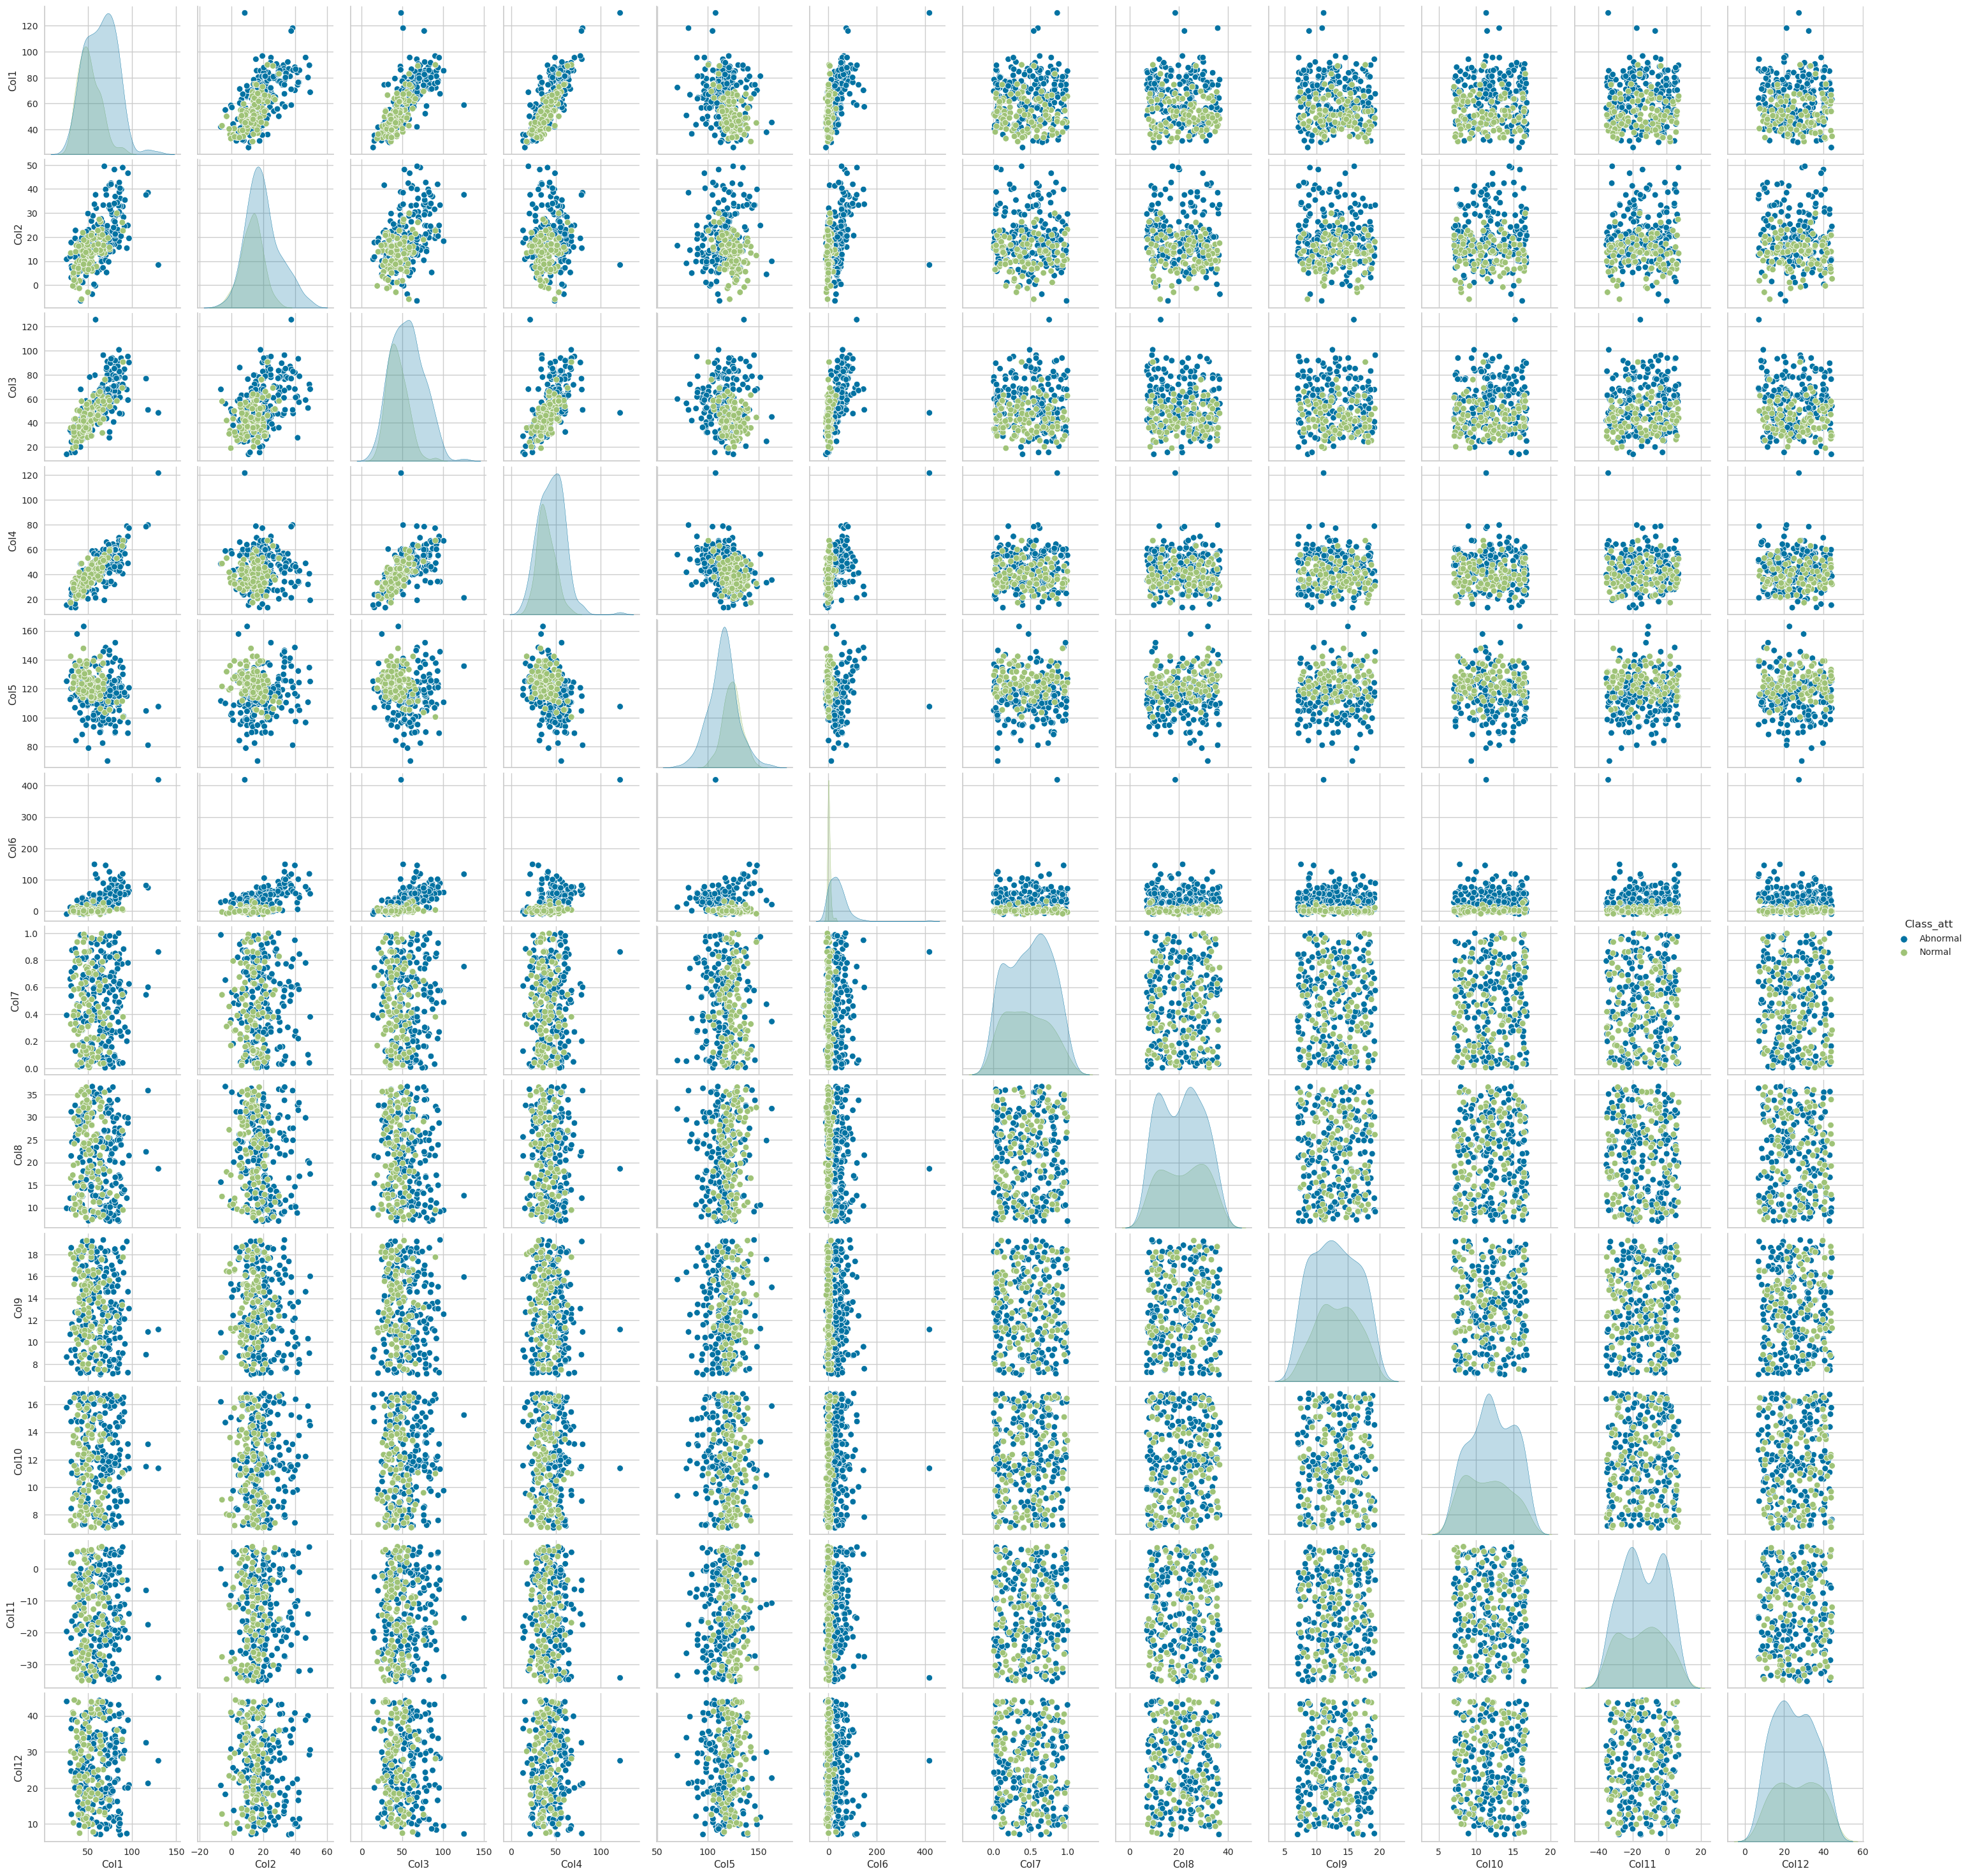

In [114]:
sns.pairplot(df,hue='Class_att')
plt.show()

# Getting the Preliminary Information

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Col1       310 non-null    float64
 1   Col2       310 non-null    float64
 2   Col3       310 non-null    float64
 3   Col4       310 non-null    float64
 4   Col5       310 non-null    float64
 5   Col6       310 non-null    float64
 6   Col7       310 non-null    float64
 7   Col8       310 non-null    float64
 8   Col9       310 non-null    float64
 9   Col10      310 non-null    float64
 10  Col11      310 non-null    float64
 11  Col12      310 non-null    float64
 12  Class_att  310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


# Checking for Missing Values

In [116]:
df.isna().sum()

Col1         0
Col2         0
Col3         0
Col4         0
Col5         0
Col6         0
Col7         0
Col8         0
Col9         0
Col10        0
Col11        0
Col12        0
Class_att    0
dtype: int64

* There is no missing values in the dataset

# Removing the Outliers

In [117]:
df=df.drop(df[df['Col6']>400].index,axis=0)

# Creating BoxPlot

<AxesSubplot:>

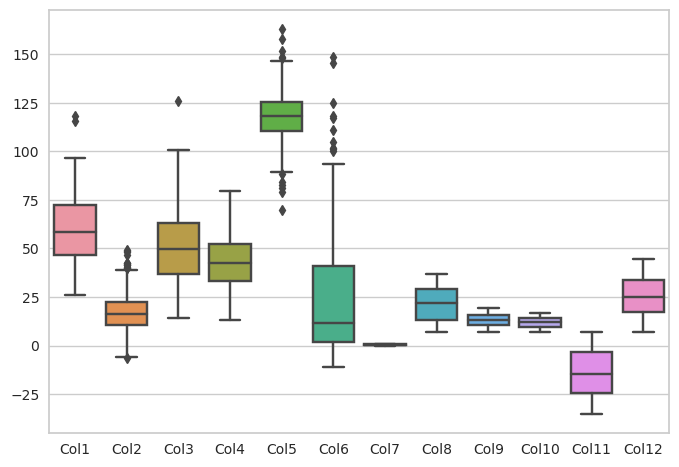

In [118]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=df)

# Preprocessing Function

In [119]:
def preprocess_inputs(df):
    df=df.copy()
    CLASS_ATTRIBUTE={'Abnormal':1,'Normal':0}
    df['Class_att']=df['Class_att'].replace(CLASS_ATTRIBUTE)
    #splitting between target and feature column
    y=df['Class_att']
    x=df.drop('Class_att',axis=1)
    #train_test_split
    data_train,data_test=train_test_split(df,train_size=0.7)
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
    
    
    
    
    
    
    return data_train,data_test,x_train,x_test,y_train,y_test

In [120]:
df['Class_att'].value_counts()

Abnormal    209
Normal      100
Name: Class_att, dtype: int64

In [121]:
data_train,data_test,x_train,x_test,y_train,y_test=preprocess_inputs(df)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(216, 12)
(93, 12)
(216,)
(93,)


# Pycaret

In [122]:
pycaret.classification.setup(data_train,target='Class_att')


(False,
 -1,
 False,
 'e0c8',
           Col1       Col2       Col3       Col4        Col5        Col6  \
 268  57.145851  16.489092  42.842148  40.656761  113.806175    5.015186   
 209  48.259918  16.417463  36.329136  31.842457   94.882339   28.343800   
 71   86.900795  32.928169  47.794346  53.972626  135.075363  101.719093   
 206  95.480232  46.550053  59.000000  48.930176   96.683907   77.283073   
 222  56.103775  13.106307  62.637020  42.997467  116.228500   31.172768   
 ..         ...        ...        ...        ...         ...         ...   
 214  45.701790  10.659860  42.577847  35.041931  130.178314   -3.388910   
 118  65.536003  24.157488  45.775169  41.378517  136.440308   16.378086   
 223  69.398819  18.898407  75.966362  50.500412  103.582542   -0.443661   
 301  89.014877  26.075981  69.021255  62.938892  111.481071    6.061508   
 43   66.285393  26.327845  47.500000  39.957550  121.219681   -0.799624   
 
          Col7       Col8     Col9      Col10      Col11

In [123]:
pycaret.classification.compare_models()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [124]:
y_train_py=data_train['Class_att'].copy()
x_train_py=data_train.drop('Class_att',axis=1).copy()
y_test_py=data_test['Class_att'].copy()
x_test_py=data_test.drop('Class_att',axis=1).copy()

In [125]:
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8279569892473119

In [126]:
y_pred=model.predict(x_test)

# Confusion Matrix

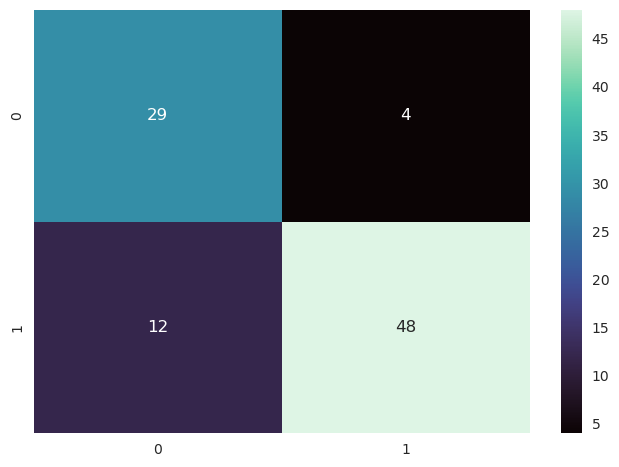

In [127]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='mako')
plt.show()

# Classification Report

In [128]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.71      0.88      0.78        33
           1       0.92      0.80      0.86        60

    accuracy                           0.83        93
   macro avg       0.82      0.84      0.82        93
weighted avg       0.85      0.83      0.83        93



# Random Forest Classifier

In [129]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
rf_model.score(x_test,y_test)

0.8064516129032258

In [130]:
y_pred_rf=rf_model.predict(x_test)

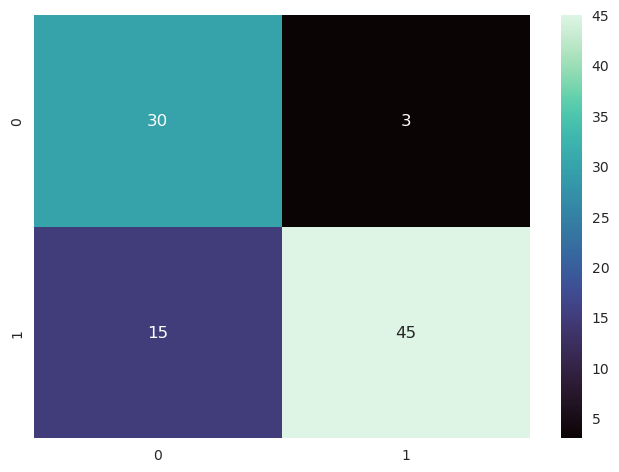

In [131]:
cm=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True,cmap='mako')
plt.show()